In [1]:
import eisplottingtool as ept
from eisplottingtool.parser import parse_circuit
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import numpy as np
%matplotlib widget

Output()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
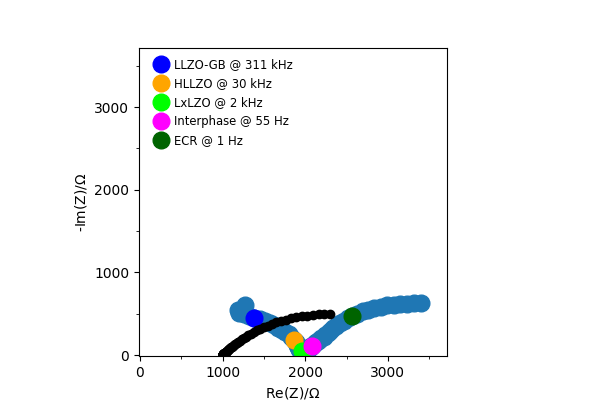

In [2]:
# set up plot
plt.close()
fig, ax = plt.subplots(figsize=(6, 4))
ax.grid(True)
cb = None
fig.clear()
ax = plt.gca()

path = r"C:\Users\ueli\Desktop\Sauter Ulrich\polishing-FC"
file1 = r"\20201021_Rabeb_LLZTO_Batch4_NOHT_Li300C_3mm_0p7th_EIS_01_PEIS_C16_01_PEIS_C02.mpr"
data = ept.load_data(path + file1)
cycle = data[-1]
cycle.plot_nyquist(
        ax,
        plot_range=(-10, 260/0.07),
        scale=1
        )

circuit = 'R0-p(R1,CPE1)-p(R2,CPE2)-Ws1'
param_info, eqn = parse_circuit(circuit)
interact = {}
for param in param_info:
    name, bounds, _ = param
    sld = widgets.FloatSlider(value=sum(bounds)/2, min=bounds[0], max=bounds[1], description=name)
    interact[name] = sld
    
interact["color"] = widgets.Checkbox(value=False, description="Color")

freq = np.logspace(-6, 12, 200)
param = {"omega": freq}


norm = matplotlib.colors.Normalize(vmin=0, vmax=2, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.bwr)
scat = ax.scatter(0,
            0,
            cmap='bwr',
            norm=norm,
            zorder=5
            )
cb = fig.colorbar(mapper, label=r"$\omega\cdot\tau$ in multiples of $2\pi$")

def update(**kwargs):
    param.update(kwargs)
    res = eqn(param)
    scat.set_offsets(np.c_[res.real,-res.imag])
    if kwargs['color']:
        scat.set_facecolor(mapper.to_rgba(freq * param["Ws1_T"] / 2 / np.pi))
        fig.axes[1].set_visible(True)
    else:
        scat.set_facecolor('black')
        fig.axes[1].set_visible(False)


out = widgets.interactive_output(update, interact)
half_way = len(interact) // 2
left_box = widgets.VBox(list(interact.values())[:half_way+1])
right_box = widgets.VBox(list(interact.values())[half_way+1:])
boxes = widgets.HBox([left_box, right_box])
display(boxes, out)